In [1]:
import os
os.chdir('/home/lunar/Desktop/IgoR_crawling/CODE_Project/')
from load_data import *
from utils import *

import project_maintainment as main_pj
import project_results as res_pj

%matplotlib inline

In [2]:
### primers 
Primers = json.load(open('/home/lunar/Desktop/IgoR_crawling/projects/Primers.json', 'r'))
Core = '/home/lunar/Desktop/IgoR_crawling/projects/'
project_names = ['project_mouse_2', 'project_mouse_3', 'PD1_BALBC', 'project_mouse_memoryT', 'Immunized']
Multi_1 = main_pj.Multi(core=Core, primers=Primers, projects=project_names)
Multi_1.load_frames()

loading frame of project project_mouse_2
loading frame of project project_mouse_3
loading frame of project PD1_BALBC
loading frame of project project_mouse_memoryT
loading frame of project Immunized


In [3]:
Multi_1.load_results()

In [10]:
Multi_1.projects['project_mouse_2']['frame'].derived_models

{'BALBC': {'BALB_C-Spleen-1_Out_18000': <genmodel.GenModel at 0x7fc21b89f630>,
  'BALB_C-Spleen-2_Out_18000': <genmodel.GenModel at 0x7fc21b89f390>,
  'BALB_C-Thymus-1_Out_18000': <genmodel.GenModel at 0x7fc21b89f588>,
  'BALB_C-Thymus-2_Out_18000': <genmodel.GenModel at 0x7fc21b89f470>},
 'C57BL': {'C57BL_6-Spleen-1_Out_18000': <genmodel.GenModel at 0x7fc21b8cb518>,
  'C57BL_6-Spleen-2_Out_18000': <genmodel.GenModel at 0x7fc21b89f518>,
  'C57BL_6-Thymus-1_Out_18000': <genmodel.GenModel at 0x7fc21b8d9cf8>,
  'C57BL_6-Thymus-2_Out_18000': <genmodel.GenModel at 0x7fc21b8b8cf8>}}

In [4]:
#Multi_1.load_results(dist_F=measure.compare_mse)
a = Multi_1.projects['project_mouse_2']['res']
b = Multi_1.projects['PD1_BALBC']['res' 
c = Multi_1.projects['project_mouse_3']['res']
d = Multi_1.projects['Immunized']['res']
e = Multi_1.projects['project_mouse_memoryT']['res']

In [6]:
pickle.dump(Multi_1, open('ALL_MODELS_DUMP', 'wb'))

PicklingError: Can't pickle <class 'genmodel.GenModel'>: import of module 'genmodel' failed

In [16]:
projects_alias = dict(zip(Multi_1.project_names,['Adaptive_Cntrl', 'Adult_embrions', 'PD1', 'MemoryT', 'CTLA4']))

In [83]:
batches_alias = {}
for pr in Multi_1.project_names:
    if pr != 'project_mouse_2':
        batches_alias.update(  dict.fromkeys( NestedDictValues(Multi_1.projects[pr]['res'].batches), 
                                             projects_alias[pr]+'|'+Multi_1.projects[pr]['res'].species[0]))
        
batches_alias = {k.split('_Out')[0]: v+'|'+k.split('_')[-1] for k,v in batches_alias.items()}

In [97]:
batches_alias.update( {'DLN_PBS_Tx_immunized': 'CTLA4|C57BL|6104',
 'DLN_PTX_Tx_immunized': 'CTLA4|C57BL|7902'})

In [150]:
X = a.bundle_together(event=None, ds = tuple(map(lambda x: x.bundle_together('v_choice'), (a,b,c,d,e))))
X.rename(index=str, columns=batches_alias, inplace=True)

In [151]:
s = [re.findall('BALB_C|BALBC|C57BL', ind)[0] for ind in X.columns]
s = ['BALBC']*4+ s[4:]

In [152]:
X = X.T
X['Species'] = s

In [157]:
X = X.replace({'BALBC':0, 'C57BL':1})

In [165]:
X_train, X_test, y_train, y_test = X.iloc[8:,:-1], X.iloc[:8,:-1], X.iloc[8:,-1], X.iloc[:8,-1]

In [171]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [172]:
model = ExtraTreesClassifier(n_estimators=64, )
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [174]:
y_test

BALB_C-Spleen-1     0
BALB_C-Spleen-2     0
BALB_C-Thymus-1     0
BALB_C-Thymus-2     0
C57BL_6-Spleen-1    1
C57BL_6-Spleen-2    1
C57BL_6-Thymus-1    1
C57BL_6-Thymus-2    1
Name: Species, dtype: int64

In [173]:
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1])

In [175]:
model = ExtraTreesClassifier(n_estimators=64, )
model.fit(X_test, y_test)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [184]:
list(zip(model.predict(X_train), y_train.index))

[(0, 'PD1|BALBC|970'),
 (0, 'PD1|BALBC|2421'),
 (0, 'PD1|BALBC|927'),
 (0, 'PD1|BALBC|1074'),
 (0, 'PD1|BALBC|1928'),
 (0, 'PD1|BALBC|1772'),
 (0, 'PD1|BALBC|2041'),
 (0, 'PD1|BALBC|7276'),
 (0, 'PD1|BALBC|7297'),
 (0, 'PD1|BALBC|7470'),
 (0, 'PD1|BALBC|8113'),
 (0, 'PD1|BALBC|7816'),
 (0, 'PD1|BALBC|9768'),
 (0, 'PD1|BALBC|7951'),
 (1, 'Adult_embrions|C57BL|12575'),
 (1, 'Adult_embrions|C57BL|5230'),
 (0, 'Adult_embrions|C57BL|4112'),
 (1, 'Adult_embrions|C57BL|18000'),
 (1, 'Adult_embrions|C57BL|13586'),
 (0, 'CTLA4|BALBC|183'),
 (0, 'CTLA4|BALBC|799'),
 (0, 'CTLA4|BALBC|353'),
 (0, 'CTLA4|BALBC|133'),
 (0, 'CTLA4|BALBC|358'),
 (0, 'CTLA4|BALBC|1266'),
 (1, 'CTLA4|C57BL|6104'),
 (1, 'CTLA4|C57BL|7902'),
 (0, 'CTLA4|BALBC|648'),
 (1, 'CTLA4|BALBC|438'),
 (0, 'CTLA4|BALBC|395'),
 (0, 'CTLA4|BALBC|991'),
 (0, 'CTLA4|BALBC|376'),
 (0, 'CTLA4|BALBC|717'),
 (0, 'MemoryT|C57BL|3768'),
 (1, 'MemoryT|C57BL|398'),
 (0, 'MemoryT|C57BL|4363')]

In [181]:
from sklearn.metrics import accuracy_score, precision_score

In [183]:
accuracy_score(model.predict(X_train), y_train.values), precision_score(model.predict(X_train), y_train.values)

(0.88888888888888884, 0.69999999999999996)

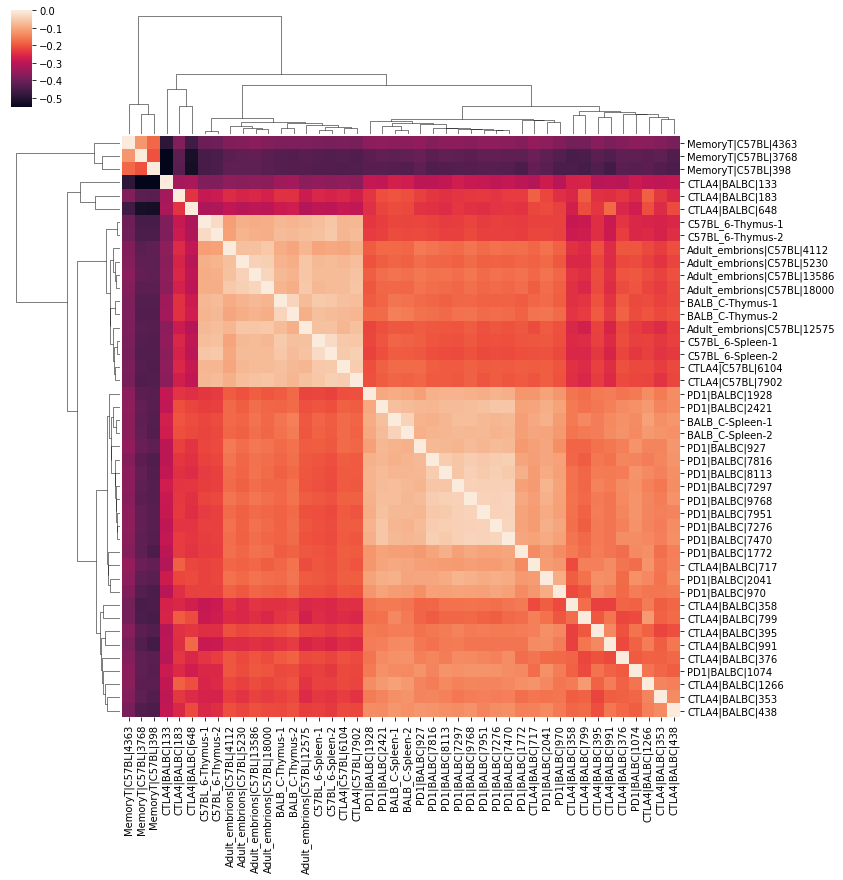

In [104]:
sns.clustermap(-np.sqrt( a.compute_pairwise_distance(X)), figsize=(12,13))

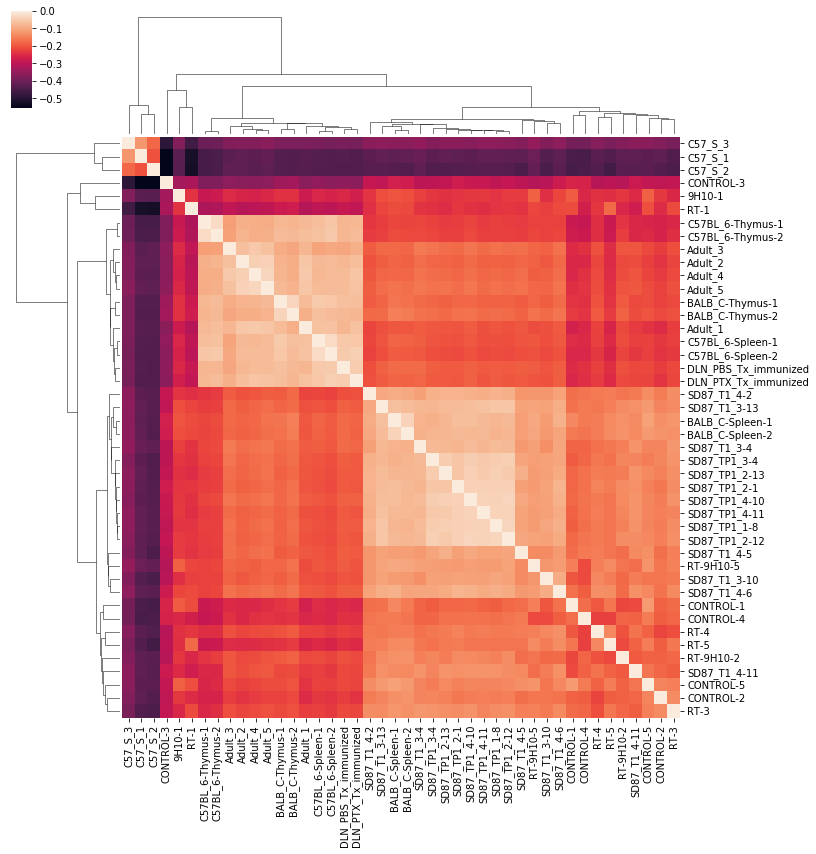

In [25]:
sns.clustermap(-np.sqrt(a.compute_pairwise_distance(a.bundle_together(event=None, 
    ds = tuple(map(lambda x: x.bundle_together('v_choice'), (a,b,c,d,e)))))), figsize=(12,13))